<a href="https://colab.research.google.com/github/SheikSadi/SAM-LSTM-RESNET/blob/master/Smart_Cropping_Images_based_on_Saliency_Mapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install sam-lstm==1.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sam-lstm: filename=sam_lstm-1.0.1-py3-none-any.whl size=16321 sha256=6ef658c63d906f15015a7ff5ab2eb6661474c0a54a98a25b863100384b41178f
  Stored in directory: /root/.cache/pip/wheels/fe/e6/43/70270e33a53c2338e50366a79448a78b43cc0920fa7959c484
Successfully built sam-lstm
  Attempting uninstall: sam-lstm
    Found existing installation: sam-lstm 1.0.0
    Uninstalling sam-lstm-1.0.0:
      Successfully uninstalled sam-lstm-1.0.0


## Upload some samples for generating saliency maps and bounding boxes

In [17]:
# Upload some samples
from google.colab import files

samples_path = os.path.abspath("samples2")
if not os.path.exists(samples_path):
    os.mkdir(samples_path)
    os.chdir(samples_path)
    uploaded = files.upload()
os.chdir("..")

## Now start generating maps and creating boxes with just two lines of code!

In [2]:
from sam_lstm import SalMap

SalMap.auto()

Predicting saliency maps for samples
4/4 [==============================] - 7s 122ms/step
Cropped and boxed puzzle.jpg successfully
Cropped and boxed marnie-house.jpg successfully
Cropped and boxed garden-of-words.jpg successfully
Cropped and boxed get lucky.jpg successfully


### Visualize the Results

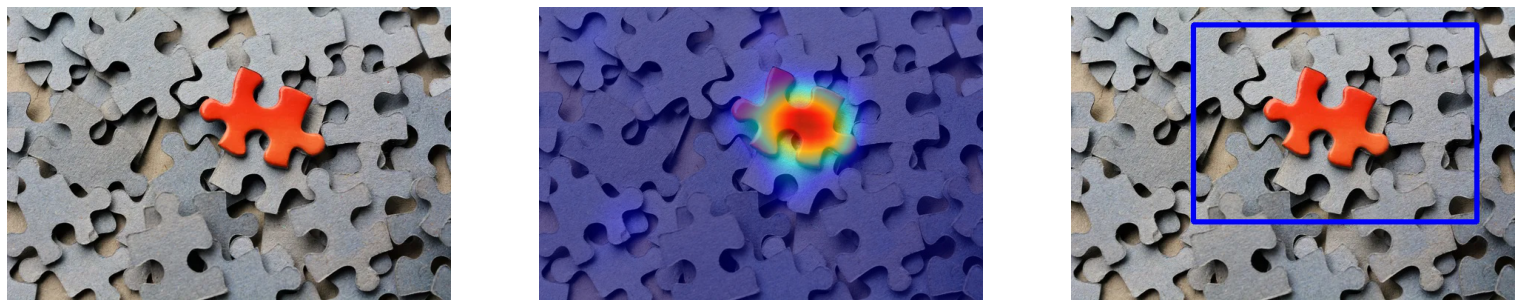

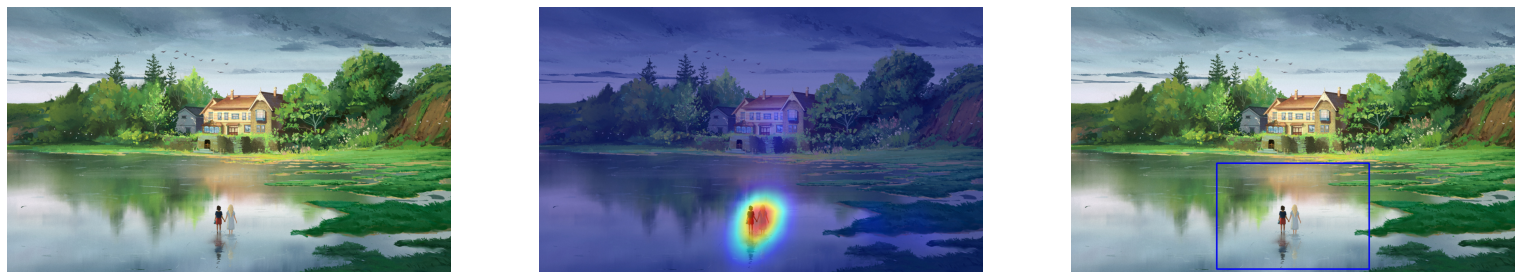

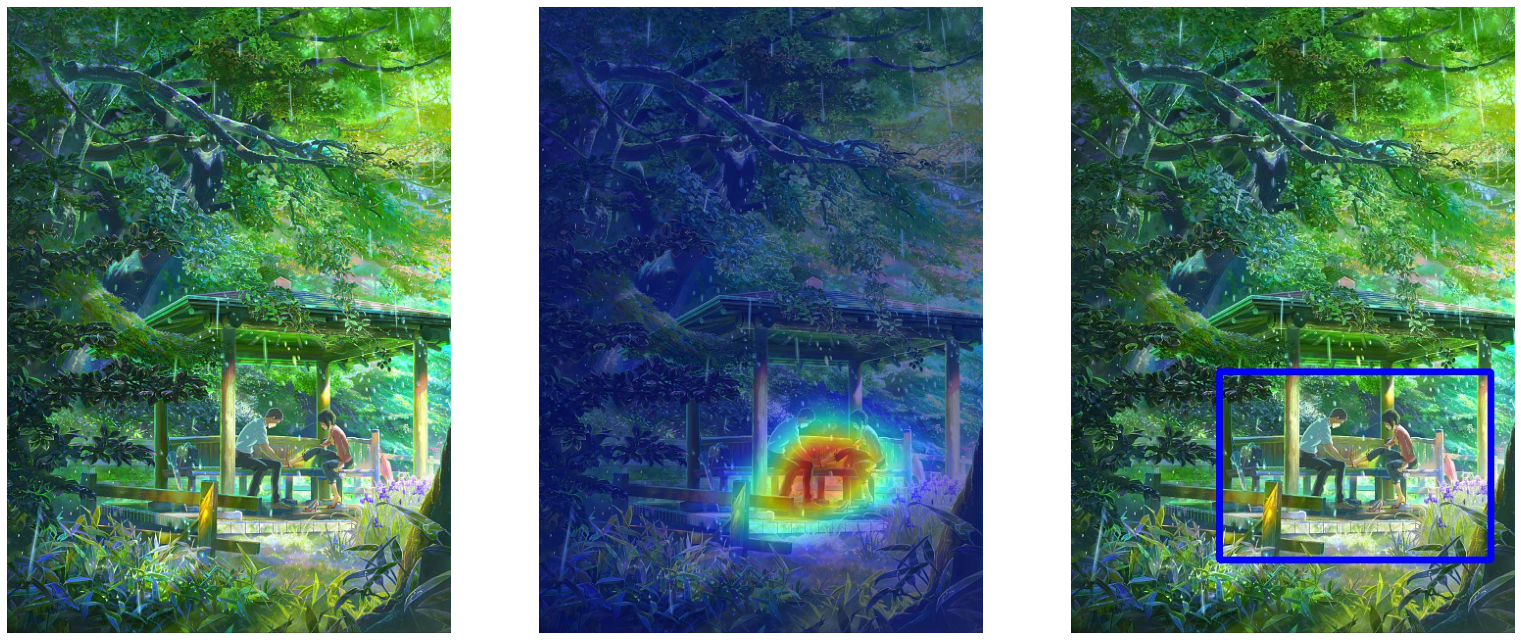

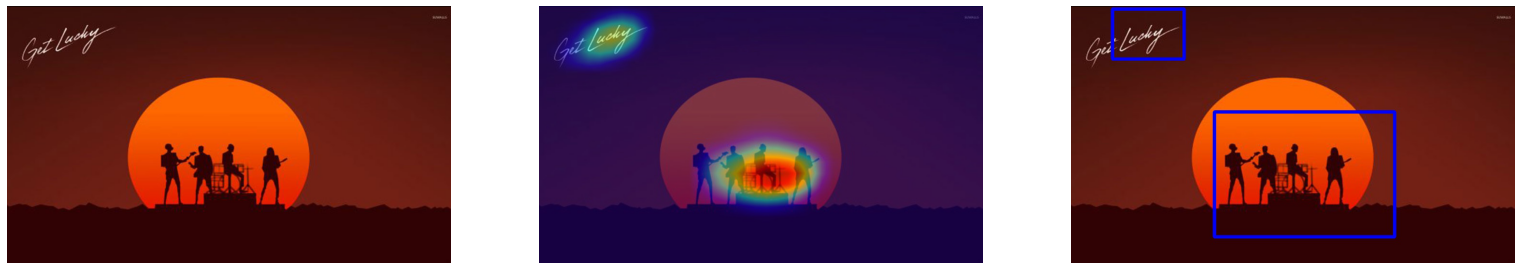

In [4]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

for fname in os.listdir("samples"):
    org = mpimg.imread(f"samples/{fname}")
    cmap = mpimg.imread(f"cmaps/{fname}")
    box = mpimg.imread(f"boxes/{fname}")

    h, w = org.shape[0], org.shape[1]
    scale = 9 / w

    fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(3 * w * scale, h * scale))
    ax0.imshow(org); ax1.imshow(cmap); ax2.imshow(box);
    ax0.axis("off"); ax1.axis("off"); ax2.axis("off");

### Train the weights and save them in your Google Drive to load them later with `s.load_weights(weights_dir)` method. More on this later.

In [7]:
from google.colab import drive
drive.mount('/content/drive')

if not os.path.exists("/content/drive/MyDrive/Checkpoints/"):
    os.mkdir("/content/drive/MyDrive/Checkpoints/")

s = SalMap()
s.compile()
s.load_weights()
s.train("dataset", "/content/drive/MyDrive/Checkpoints/", steps_per_epoch=1000)

Didn't find dataset/images
1401448436/1401448436 [==============================] - 161s 0us/step
Didn't find dataset/maps
452252714/452252714 [==============================] - 25s 0us/step
Didn't find dataset/fixations
1536284460/1536284460 [==============================] - 52s 0us/step
Training SAM-ResNet
Epoch 1/20
1000/1000 [==============================] - 435s 410ms/step - loss: 35.0589 - lambda_3_loss: 2.9820 - lambda_3_1_loss: -1.6745 - lambda_3_2_loss: -1.8901 - val_loss: 31.8920 - val_lambda_3_loss: 2.6754 - val_lambda_3_1_loss: -1.6977 - val_lambda_3_2_loss: -1.7422
Epoch 2/20
1000/1000 [==============================] - 399s 399ms/step - loss: 32.4728 - lambda_3_loss: 2.7211 - lambda_3_1_loss: -1.6978 - lambda_3_2_loss: -1.8667 - val_loss: 36.6879 - val_lambda_3_loss: 3.1534 - val_lambda_3_1_loss: -1.6894 - val_lambda_3_2_loss: -1.7753
Epoch 3/20
1000/1000 [==============================] - 399s 399ms/step - loss: 32.2355 - lambda_3_loss: 2.6920 - lambda_3_1_loss: -1.704

## Make predictions with the recently trained weights (saved on Google Drive)

In [22]:
s = SalMap()
s.compile()
s.load_weights("/content/drive/MyDrive/Checkpoints/sam-resnet-salicon.h5")
s.predict_maps()
s.box_and_crop()

Predicting saliency maps for samples
4/4 [==============================] - 3s 140ms/step
Cropped and boxed puzzle.jpg successfully
Cropped and boxed marnie-house.jpg successfully
Cropped and boxed garden-of-words.jpg successfully
Cropped and boxed get lucky.jpg successfully


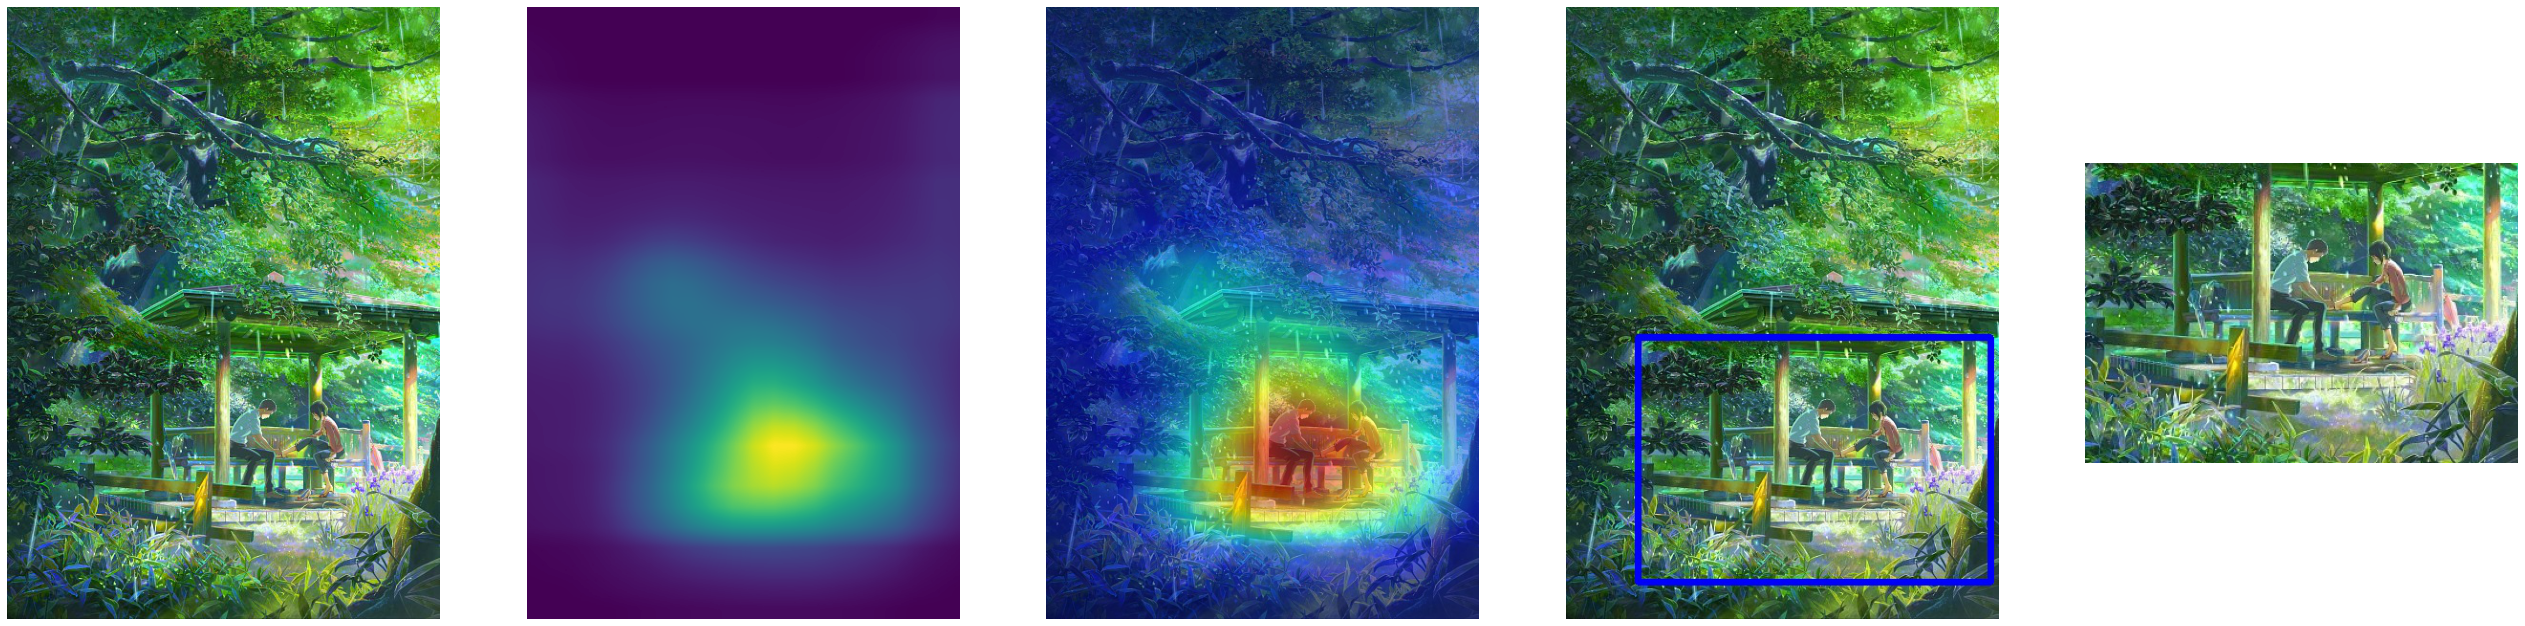

In [30]:
fname = "garden-of-words.jpg"

org = mpimg.imread(f"samples/{fname}")
map = mpimg.imread(f"maps/{fname}")
cmap = mpimg.imread(f"cmaps/{fname}")
box = mpimg.imread(f"boxes/{fname}")
crop = mpimg.imread(f"crops/{fname}")

h, w = org.shape[0], org.shape[1]
scale = 9 / w

fig, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(1, 5, figsize=(5 * w * scale, h * scale))
ax0.imshow(org); ax1.imshow(map); ax2.imshow(cmap); ax3.imshow(box); ax4.imshow(crop);
ax0.axis("off"); ax1.axis("off"); ax2.axis("off"); ax3.axis("off"); ax4.axis("off");

# Thank You!